# HW2

In [1]:
import pandas as pd
import numpy as np
import requests
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

## Question 1

In [2]:
def get_data(token):
    
    if token == 'FLOW':
        exchange = 'kraken'
    else :
        exchange = 'coinbase-pro'

    res = requests.get(
        f'https://api.cryptowat.ch/markets/{exchange}/{token}usd/ohlc',
        params={
            'periods': '3600',
            'after': str(int(pd.Timestamp('2021-11-22').timestamp()))
        }
    )
    df = pd.DataFrame(
        res.json()['result']['3600'],
        columns=['ts', 'open', 'high', 'low', 'close', 'volume', 'volumeUSD']
    )
    df['ts'] = pd.to_datetime(df.ts, unit='s')
    df['token'] = token
    
    return df

In [3]:
tokens = ['ETH', 'SOL', 'AVAX', 'USDT', 'FLOW']

In [4]:
df = pd.concat(get_data(token) for token in tokens)
df

,ts,open,high,low,close,volume,volumeUSD,token
0,2021-11-22 00:00:00,4317.980,4342.240,4246.070,4262.990,7262.562789,3.123077e+07,ETH
1,2021-11-22 01:00:00,4263.040,4270.340,4212.450,4234.370,8437.946084,3.574586e+07,ETH
2,2021-11-22 02:00:00,4234.870,4246.720,4171.170,4217.890,9259.725370,3.895639e+07,ETH
3,2021-11-22 03:00:00,4217.880,4223.480,4163.580,4193.470,9259.899519,3.882032e+07,ETH
4,2021-11-22 04:00:00,4192.950,4213.590,4147.000,4168.350,7934.546906,3.315476e+07,ETH
...,...,...,...,...,...,...,...,...
697,2021-12-21 01:00:00,8.177,8.177,8.122,8.131,14565.601873,1.188000e+05,FLOW
698,2021-12-21 02:00:00,8.135,8.135,8.082,8.112,5493.448142,4.451182e+04,FLOW
699,2021-12-21 03:00:00,8.117,8.126,8.105,8.113,4389.195315,3.559826e+04,FLOW
700,2021-12-21 04:00:00,8.111,8.219,8.095,8.212,18394.802681,1.498502e+05,FLOW


## Question 2

In [5]:
df[['token','volumeUSD']].groupby(['token']).sum().sort_values('volumeUSD')

,volumeUSD
token,
FLOW,9.896405e+07
USDT,2.332238e+09
AVAX,4.683804e+09
SOL,8.470791e+09
ETH,2.593819e+10


## Question 3

In [6]:
df['close price ratio'] =  df['close'][df.token=='ETH'] / df['close'][df.token=='SOL']
df

,ts,open,high,low,close,volume,volumeUSD,token,close price ratio
0,2021-11-22 00:00:00,4317.980,4342.240,4246.070,4262.990,7262.562789,3.123077e+07,ETH,18.471694
1,2021-11-22 01:00:00,4263.040,4270.340,4212.450,4234.370,8437.946084,3.574586e+07,ETH,18.736150
2,2021-11-22 02:00:00,4234.870,4246.720,4171.170,4217.890,9259.725370,3.895639e+07,ETH,18.577985
3,2021-11-22 03:00:00,4217.880,4223.480,4163.580,4193.470,9259.899519,3.882032e+07,ETH,18.794937
4,2021-11-22 04:00:00,4192.950,4213.590,4147.000,4168.350,7934.546906,3.315476e+07,ETH,18.891059
...,...,...,...,...,...,...,...,...,...
697,2021-12-21 01:00:00,8.177,8.177,8.122,8.131,14565.601873,1.188000e+05,FLOW,22.802037
698,2021-12-21 02:00:00,8.135,8.135,8.082,8.112,5493.448142,4.451182e+04,FLOW,22.981526
699,2021-12-21 03:00:00,8.117,8.126,8.105,8.113,4389.195315,3.559826e+04,FLOW,22.865516
700,2021-12-21 04:00:00,8.111,8.219,8.095,8.212,18394.802681,1.498502e+05,FLOW,22.836011


## Question 4

In [7]:
df.rename(columns = {'volume':'volumeBase', 'volumeUSD':'volumeTerm'}, inplace = True)
df

,ts,open,high,low,close,volumeBase,volumeTerm,token,close price ratio
0,2021-11-22 00:00:00,4317.980,4342.240,4246.070,4262.990,7262.562789,3.123077e+07,ETH,18.471694
1,2021-11-22 01:00:00,4263.040,4270.340,4212.450,4234.370,8437.946084,3.574586e+07,ETH,18.736150
2,2021-11-22 02:00:00,4234.870,4246.720,4171.170,4217.890,9259.725370,3.895639e+07,ETH,18.577985
3,2021-11-22 03:00:00,4217.880,4223.480,4163.580,4193.470,9259.899519,3.882032e+07,ETH,18.794937
4,2021-11-22 04:00:00,4192.950,4213.590,4147.000,4168.350,7934.546906,3.315476e+07,ETH,18.891059
...,...,...,...,...,...,...,...,...,...
697,2021-12-21 01:00:00,8.177,8.177,8.122,8.131,14565.601873,1.188000e+05,FLOW,22.802037
698,2021-12-21 02:00:00,8.135,8.135,8.082,8.112,5493.448142,4.451182e+04,FLOW,22.981526
699,2021-12-21 03:00:00,8.117,8.126,8.105,8.113,4389.195315,3.559826e+04,FLOW,22.865516
700,2021-12-21 04:00:00,8.111,8.219,8.095,8.212,18394.802681,1.498502e+05,FLOW,22.836011


## Question 5

In [8]:
df_FatTable = pd.concat((df['close'][df.token==token].rename(f'{token}') for token in tokens), axis=1)
df_FatTable

,ETH,SOL,AVAX,USDT,FLOW
0,4262.99,230.785,128.67,1.0012,14.150
1,4234.37,226.000,134.85,1.0013,13.621
2,4217.89,227.037,132.54,1.0012,13.753
3,4193.47,223.117,133.38,1.0011,13.652
4,4168.35,220.652,136.29,1.0009,13.581
...,...,...,...,...,...
697,3940.42,172.810,112.00,1.0003,8.131
698,3930.99,171.050,112.49,1.0003,8.112
699,3920.75,171.470,111.29,1.0002,8.113
700,4007.72,175.500,114.44,1.0001,8.212


## Question 6

In [10]:
hour_log_return = np.log(df_FatTable/df_FatTable.shift(1)).dropna()
hour_log_return

,ETH,SOL,AVAX,USDT,FLOW
1,-0.006736,-0.020952,0.046912,0.0001,-0.038102
2,-0.003900,0.004578,-0.017279,-0.0001,0.009644
3,-0.005806,-0.017417,0.006318,-0.0001,-0.007371
4,-0.006008,-0.011109,0.021583,-0.0002,-0.005214
5,-0.002472,-0.015161,-0.031832,-0.0001,-0.014014
...,...,...,...,...,...
697,-0.001456,-0.007207,-0.013744,0.0000,-0.004907
698,-0.002396,-0.010237,0.004365,0.0000,-0.002339
699,-0.002608,0.002452,-0.010725,-0.0001,0.000123
700,0.021940,0.023231,0.027911,-0.0001,0.012129


## Question 7

In [11]:
correlation = hour_log_return.corr()
correlation

,ETH,SOL,AVAX,USDT,FLOW
ETH,1.000000,0.762833,0.659899,-0.085722,0.580529
SOL,0.762833,1.000000,0.650365,0.102994,0.478354
AVAX,0.659899,0.650365,1.000000,0.015807,0.406150
USDT,-0.085722,0.102994,0.015807,1.000000,-0.175488
FLOW,0.580529,0.478354,0.406150,-0.175488,1.000000


## Question 8

<AxesSubplot:>

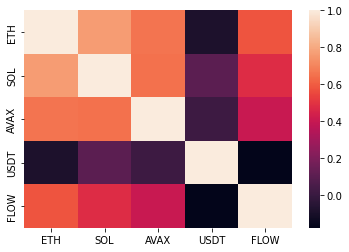

In [12]:
sns.heatmap(correlation)